# Práctica # 2.1

##### Statistical Learning II
##### Gustavo Alvarado
##### Carnet # 20063401 

In [102]:
import numpy as np
import pandas as pd
import io
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
# Importing data from Excel

from google.colab import files
uploaded = files.upload()

Saving estaturas.xlsx to estaturas (2).xlsx


In [3]:
df = pd.read_excel(io.BytesIO(uploaded['estaturas.xlsx']), sheet_name='normales')
df

,Estatura(metros),Edad(años)
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32
5,1.66,29
6,1.64,27
7,1.85,34
8,1.85,26
9,1.75,21


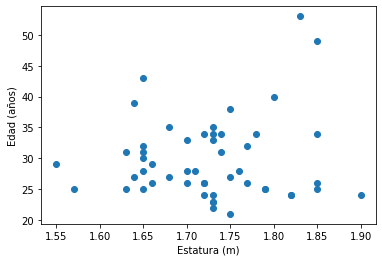

In [4]:
# Plotting data

x1 = df['Estatura(metros)']
x2 = df['Edad(años)'] 

plt.scatter(x1, x2)
plt.xlabel('Estatura (m)')
plt.ylabel('Edad (años)')
plt.show()

In [192]:
# Function to calculate probability distribution

def calculateProbability(df):
  mu = np.mean(df, axis = 0)
  variance = np.var(df, axis = 0)
  sigma = np.cov(df.T)
  p = multivariate_normal(mean = mu, cov = sigma)
  return p.pdf(df)

In [207]:
# Calculating probability
p = calculateProbability(df.values)
p



array([0.22000903, 0.31270681, 0.21847104, 0.21195253, 0.17721042,
       0.22065959, 0.16101683, 0.07353374, 0.06157026, 0.11824499,
       0.18630036, 0.15893675, 0.08716376, 0.15976227, 0.15893675,
       0.26148947, 0.26223073, 0.0332192 , 0.1956178 , 0.27468524,
       0.26109156, 0.06922135, 0.05424073, 0.08716376, 0.14672219,
       0.26403746, 0.02102753, 0.27538463, 0.25115389, 0.19323195,
       0.27272674, 0.01153369, 0.26188541, 0.28730839, 0.00039521,
       0.19200287, 0.21598976, 0.15700158, 0.18630036, 0.02090716,
       0.27272674, 0.1372129 , 0.23707871, 0.0018643 , 0.30565183,
       0.29579289, 0.18689344, 0.12010094, 0.0534763 , 0.26617617,
       0.18721007])

In [79]:
# Obtaining cross validation and test data 

normal = pd.read_excel(io.BytesIO(uploaded['estaturas.xlsx']), sheet_name='valtest(normales)')
normal


,Estatura(metros),Edad(años)
0,1.82,25
1,1.80,27
2,1.60,31
3,1.60,35
4,1.82,30
5,1.76,32
6,1.79,31
7,1.61,31


In [80]:
anomaly = pd.read_excel(io.BytesIO(uploaded['estaturas.xlsx']), sheet_name='valtest(anomalias)')
anomaly

,Estatura(metros),Edad(años)
0,0.25,2.4
1,175.10,2.5
2,0.15,250.0
3,150.00,14.0


In [81]:
# Defining y values 

normal['y'] = 0
anomaly['y'] = 1

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0


In [244]:
# Cross validation and test data separation

x_normal = normal.iloc[:,:2]
y_normal = normal.loc[:,'y':]

x_anomaly = anomaly.iloc[:,:2]
y_anomaly = anomaly.loc[:,'y':]

x_cv_normal, x_test_normal, y_cv_normal, y_test_normal = train_test_split(x_normal, y_normal, test_size = 0.5)
x_cv_anomaly, x_test_anomaly, y_cv_anomaly, y_test_anomaly = train_test_split(x_anomaly, y_anomaly, test_size = 0.5)


x_cv = x_cv_normal.append(x_cv_anomaly)
y_cv = y_cv_normal.append(y_cv_anomaly)

x_test = x_test_normal.append(x_test_anomaly)
y_test = y_test_normal.append(y_test_anomaly)



In [245]:
# Calculating probability for cross-validation

p_cv = calculateProbability(x_cv.values)
p_cv

array([1.85224521e-04, 1.85338685e-04, 1.76715996e-04, 1.92924823e-04,
       2.84074157e-05, 2.85777242e-05])

In [246]:
# Calculating probabilities lower than or equal to the mean

epsilon_list = [i for i in p_cv if i <= p_cv.mean()]
epsilon_list

[2.840741565300899e-05, 2.8577724184478333e-05]

In [261]:
# Function to calculate F1

def calculateF1(epsilon, p, y):
    
    #Calculating true positives, false positives and false negatives
    truePositives = 0
    falsePositives = 0
    falseNegatives = 0

    for i in range(len(y)):
        if p[i] <= epsilon and y[i][0] == 1:
            truePositives += 1
        elif p[i] <= epsilon and y[i][0] == 0:
            falsePositives += 1
        elif p[i] > epsilon and y[i][0] == 1:
            falseNegatives += 1

    precision = truePositives / (truePositives + falsePositives)
    recall = truePositives / (truePositives + falseNegatives)
    f1 = 2 * precision * recall / (precision + recall)
    return f1

In [264]:
f1Results = []
for epsilon in epsilon_list:
    f1Results.append(calculateF1(epsilon, p_cv, y_cv.values))
f1Results


[0.6666666666666666, 1.0]

In [249]:
selectedEpsilon = epsilon_list[np.array(f1Results).argmax()]
selectedEpsilon

2.8577724184478333e-05

In [250]:
# Finding the anomalies

label = []
for i in range(len(df.values)):
    if p[i] <= selectedEpsilon:
        label.append(1)
    else:
        label.append(0)
label


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## Conclusión
Con los valores de anomalías registrados manualmente para las pruebas, no se registra ninguna anomalía. Como experimento, se procederá a ingresar otras anomalías de prueba más realistas.

In [243]:
anomaly1 = pd.DataFrame().reindex_like(anomaly)

anomaly1.loc[0, 'Estatura(metros)'] = 1.50 
anomaly1.loc[0, 'Edad(años)'] = 19

anomaly1.loc[1, 'Estatura(metros)'] = 1.60 
anomaly1.loc[1, 'Edad(años)'] = 49

anomaly1.loc[2, 'Estatura(metros)'] = 1.95
anomaly1.loc[2, 'Edad(años)'] = 24

anomaly1.loc[3, 'Estatura(metros)'] = 1.85 
anomaly1.loc[3, 'Edad(años)'] = 51

anomaly1['y'] = 1

anomaly1

,Estatura(metros),Edad(años),y
0,1.50,19.0,1
1,1.60,49.0,1
2,1.95,24.0,1
3,1.85,51.0,1


In [257]:
x_anomaly1 = anomaly1.iloc[:,:2]
y_anomaly1 = anomaly1.loc[:,'y':]

x_cv1 = x_cv_normal.append(x_anomaly1)
y_cv1 = y_cv_normal.append(y_anomaly1)

In [258]:
p_cv1 = calculateProbability(x_cv1.values)
p_cv1

array([0.06668382, 0.08603649, 0.09262885, 0.0759101 , 0.01467076,
       0.02092783, 0.02127491, 0.0226254 ])

In [259]:
epsilon_list1 = [i for i in p_cv1 if i <= p_cv1.mean()]
epsilon_list1

[0.014670757690447503,
 0.020927825000405065,
 0.02127490588490956,
 0.022625396205774764]

In [265]:
f1Results1 = []
for epsilon1 in epsilon_list1:
    f1Results1.append(calculateF1(epsilon1, p_cv1, y_cv1.values))
f1Results1

[0.4, 0.6666666666666666, 0.8571428571428571, 1.0]

In [266]:
selectedEpsilon1 = epsilon_list1[np.array(f1Results1).argmax()]
selectedEpsilon1

0.022625396205774764

In [268]:
# Finding the anomalies for experiment

label1 = []
for i in range(len(df.values)):
    if p[i] <= selectedEpsilon1:
        label1.append(1)
    else:
        label1.append(0)
label1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## Conclusión del experimento

Con valores de prueba de anomalías más realistas, el resultado fue positivo para el conjunto de datos y se detectaron algunas anomalías. En la gráfica siguiente se pueden observar en amarillo los elementos detectados como anomalías.

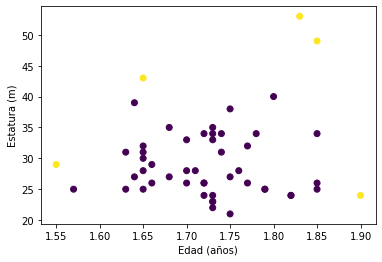

In [269]:
plt.scatter(x1, x2, c = label1)
plt.xlabel('Edad (años)')
plt.ylabel('Estatura (m)')
plt.show()